Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.043062
test accuracy: 70.000000


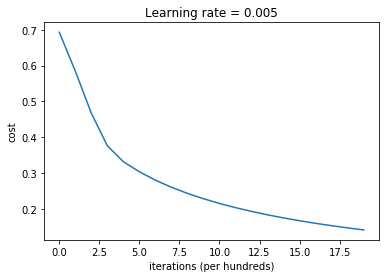

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

# 导入数据集
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
# index = 9
# plt.imshow(train_set_x_orig[index])
# print("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

# 将训练样本和测试样本Flatten
train_set_x_flatten = train_set_x_orig.reshape(m_train, -1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test, -1).T

# 标准化训练样本和测试样本
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

# 学习算法的通用架构

# 激活函数
def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

# 初始化参数
def initialize_params(dim):
    w = np.zeros((dim, 1))
    b = np.zeros((1, 1))

    assert(w.shape == (dim, 1))
    assert(b.shape == (1, 1))
    return w, b

# 正向传播
def forward_prop(w, b, X):
	z = np.dot(w.T, X) + b
	y_hat = sigmoid(z)
	z = {"z": z}  	# 缓存z 以便反向传播
	return y_hat, z

# 反向传播
def backward_prop(X, A, Y):
	m = Y.shape[1]
	cost = (-1/m) * np.sum([Y*np.log(A) + (1-Y)*np.log(1-A)])
	
	dw = (1/m) * np.dot(X, (A-Y).T)
	db = (1/m) * np.sum(A-Y)
	grads = {"dw": dw, "db": db}
	
	return grads, cost
	
# 优化（梯度下降）
def optimize(w, b, X, Y, num_itera, learning_rate, print_cost = False):
	costs = []
	
	for i in range(num_itera):
		
		y_hat, z = forward_prop(w, b, X)
		grads, cost = backward_prop(X, y_hat, Y)
		
		w -= learning_rate * grads["dw"]
		b -= learning_rate * grads["db"]
		
		if i % 100 == 0:
			costs.append(cost)
		
		if print_cost and (i % 100 == 0):
			print("Cost after iteration %i: %f" % (i, cost))
		
	params = {"w": w, "b": b}
# 	grads = {"dw": dw, "db": db}
	
	return params, grads, costs
 
 # 预测函数
def predict(w, b, X):
	
	m = X.shape[1]
	A = sigmoid(np.dot(w.T, X) + b)
	
	Y_pred = (A > 0.5)
	
	assert(Y_pred.shape == (1, m))
	
	return Y_pred
	
# 把所有组件合并进模型
def model(X_train, Y_train, X_test, Y_test, num_itera = 2000, learning_rate = 0.5, print_cost = False):
	
	n_x = X_train.shape[0]
	w, b = initialize_params(n_x)
	
	params, grads, costs = optimize(w, b, X_train, Y_train, num_itera, learning_rate, print_cost)
	
	w = params["w"]
	b = params["b"]
	
	Y_pred_train = predict(w, b, X_train)
	Y_pred_test = predict(w, b, X_test)
	
	train_acc = (1 - np.mean(np.abs(Y_pred_train - Y_train))) * 100
	test_acc = (1 - np.mean(np.abs(Y_pred_test - Y_test))) * 100
	print("train accuracy: %f" % train_acc)
	print("test accuracy: %f" % test_acc)
	
	dic = {"costs": costs, 
	"Y_pred_train:": Y_pred_train, "Y_pred_test": Y_pred_test, 
	"w": w, "b": b, 
	"learning_rate": learning_rate, 
	"num_itera": num_itera}
	
	return dic

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_itera = 2000, learning_rate = 0.005, print_cost = True)


# 绘制损失函数的学习曲线
costs = np.squeeze(d["costs"]) # 压缩维度为1的条目，即删除shape中的1
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()


learning rate is: 0.01
train accuracy: 99.521531
test accuracy: 68.000000

------------------------------------------------------
learning rate is: 0.001
train accuracy: 88.995215
test accuracy: 64.000000

------------------------------------------------------
learning rate is: 0.0001
train accuracy: 68.421053
test accuracy: 36.000000

------------------------------------------------------


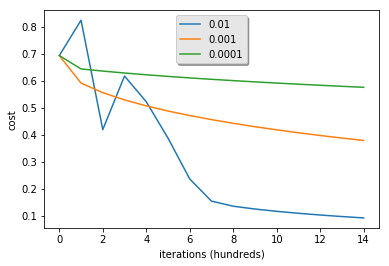

In [2]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_itera = 1500, learning_rate = i, print_cost = False)
    print('\n' + "------------------------------------------------------")
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label = str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc = 'upper center', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

y = True, your algorithm predicts a "cat" picture.


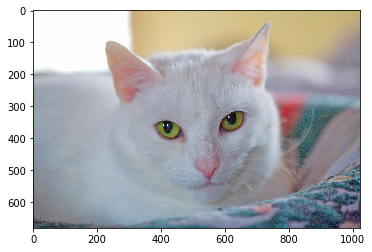

In [3]:
# 测试
my_image = "white_cat.jpg"

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten = False))
my_image = scipy.misc.imresize(image, size = (num_px, num_px)).reshape((1, -1)).T
my_pred_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_pred_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_pred_image)),].decode("utf-8") + "\" picture.")